In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.ensemble import VotingRegressor

from lightgbm import LGBMRegressor

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import RFE

from sklearn.preprocessing import LabelEncoder



from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_log_error

import scipy
from matplotlib import pylab
from pylab import *
from scipy.special import boxcox,inv_boxcox

In [2]:
train_df = pd.read_csv('dataset/BuyAffinity_Train1.csv')
test_df = pd.read_csv('dataset/BuyAffinity_Test1.csv')

train_df.head(10)

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0
5,6,0.922726,0.600115,0.616261,0.339285,-6554,8770,1065,-9720,5801,...,-6662571037,6/28/1990,1/23/1998,4,1,806,157,6,5,0
6,7,0.858156,0.546053,0.066203,0.998563,-9455,-9937,4079,8178,-663,...,-7236244398,10/22/1989,10/29/1991,1,2,448,702,5,1,0
7,8,0.707213,0.302135,0.686451,0.747126,7089,2404,3157,5484,-2829,...,-6408783500,12/29/1984,4/1/1983,1,1,187,123,3,1,0
8,9,0.971173,0.715137,0.748127,0.783115,554,-3388,1279,4381,-8957,...,1802050857,10/14/1992,4/14/1992,2,1,701,34,5,1,0
9,10,0.133155,0.314039,0.919551,0.143820,8952,6923,3112,-7115,-1413,...,-9215966088,1/21/1988,5/30/1991,1,2,502,706,1,1,0


In [3]:
print(train_df.shape,test_df.shape)
test_df.head(10)

(101180, 24) (19913, 23)


,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,T30234341,0.654765,0.812009,0.603190,0.391039,-5220,4825,-1784,7447,-7147,...,8074343777,5553595074,9/17/1996,8/18/1990,1,1,436,478,1,1
1,T30234342,0.694636,0.690568,0.473460,0.259760,-618,-5018,2012,9259,9267,...,-5556861821,2216284070,11/7/1985,4/11/1990,1,1,138,56,10,4
2,T30234343,0.203759,0.323301,0.492294,0.011448,-8778,6141,6965,3774,4303,...,-2121815725,-315409510,7/9/1984,5/4/1997,1,1,117,323,10,1
3,T30234344,0.319627,0.286247,0.906197,0.093840,-7929,4471,7715,9543,335,...,1389754605,-3360224957,6/3/1987,7/1/1988,1,1,115,149,16,21
4,T30234345,0.236003,0.782784,0.285689,0.383585,-3296,4564,-1580,-8559,-27,...,3653338555,7604838279,7/17/1984,12/3/1993,1,1,527,281,3,1
5,T30234346,0.293128,0.721630,0.480339,0.771277,-509,2549,5224,-4376,-1628,...,3701033831,3627508702,12/1/1987,4/6/1984,1,2,55,701,6,13
6,T30234347,0.215699,0.529285,0.696483,0.762073,3358,-8964,-301,7699,8848,...,3556819134,-4617195715,4/26/1992,11/15/1992,1,1,297,569,1,1
7,T30234348,0.166002,0.181940,0.803381,0.500344,1827,8254,-3269,2023,-1507,...,4664483743,-6813037365,3/29/1987,9/28/1992,1,1,439,586,1,1
8,T30234349,0.176285,0.725116,0.369549,0.290309,-335,2286,-8973,-424,3874,...,-4881165797,3084510023,6/19/1991,3/13/1992,1,1,32,110,1,9
9,T30234350,0.434003,0.422799,0.476451,0.978530,7386,2621,-3887,5144,-7577,...,9766091084,8797572954,4/30/1982,8/3/1990,2,1,710,575,6,1


In [4]:
train_df.describe()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F12,F13,F14,F17,F18,F19,F20,F21,F22,C
count,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,...,1.011800e+05,1.011800e+05,1.011800e+05,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000
mean,50590.500000,0.502348,0.501497,0.499886,0.499839,-29.742617,1.511000,7.939118,16.434147,9.927812,...,6.921685e+06,1.127538e+07,-5.198163e+07,1.339593,1.335027,387.181479,387.333999,4.588031,4.598567,0.245375
std,29208.294456,0.288058,0.289017,0.288875,0.288729,5781.829379,5796.594007,5765.581875,5782.805211,5771.004738,...,5.771750e+09,5.786659e+09,5.782358e+09,0.894065,0.882435,235.939585,235.374285,4.775671,4.776494,0.430311
min,1.000000,0.000018,0.000004,0.000002,0.000006,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,...,-9.999754e+09,-9.999852e+09,-9.999767e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,25295.750000,0.253819,0.251115,0.248818,0.250501,-5045.000000,-5012.000000,-4979.000000,-4988.000000,-4992.250000,...,-4.991278e+09,-5.027003e+09,-5.070403e+09,1.000000,1.000000,187.000000,187.000000,1.000000,1.000000,0.000000
50%,50590.500000,0.501802,0.501095,0.499820,0.501387,-46.000000,-11.500000,16.500000,60.000000,22.500000,...,4.277384e+07,9.416236e+06,-8.816174e+07,1.000000,1.000000,374.000000,375.000000,3.000000,3.000000,0.000000
75%,75885.250000,0.753598,0.752404,0.750281,0.748803,4978.000000,5050.000000,4962.000000,5021.000000,5020.000000,...,5.008238e+09,5.032947e+09,4.947133e+09,1.000000,1.000000,560.000000,561.000000,7.000000,7.000000,0.000000
max,101180.000000,0.999986,0.999990,0.999985,0.999977,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9.999555e+09,9.999951e+09,9.999997e+09,6.000000,6.000000,901.000000,901.000000,21.000000,21.000000,1.000000


In [5]:
print('Train Data Orignal Size {}\n'.format(train_df.shape))
if(any(train_df.duplicated())==True):
    print('Duplicate rows found')
    print('Number of duplicate rows= ',train_df[train_df.duplicated()].shape[0])
    train_df.drop_duplicates(inplace=True,keep='first')
    train_df.reset_index(inplace=True,drop=True)
    print('Dropping duplicates')
    print(train_df.shape)
else:
    print('NO duplicate data')


Train Data Orignal Size (101180, 24)

NO duplicate data


In [6]:
def missing_values(df):

    cols = df.columns
    count = [df[col].isnull().sum() for col in cols]
    percent = [i/len(df) for i in count]
    missing = pd.DataFrame({'number':count, 'proportion': percent}, index=cols)
    

    return missing.sort_values(by='number', ascending=False)

missing_train = missing_values(test_df)
missing_train.head()

,number,proportion
Index,0,0.0
F12,0,0.0
F21,0,0.0
F20,0,0.0
F19,0,0.0


In [7]:
print('TRAIN DATA- ',end=' ')
if(any(train_df.isnull().any())):
    print('Missing Data\n')
    print(train_df.isnull().sum())
else:
    print('NO missing data')
    
print('\nTEST DATA- ',end=' ')
if(any(test_df.isnull().any())):
    print('Missing Data\n')
    print(test_df.isnull().sum())
else:
    print('NO missing data')

TRAIN DATA-  NO missing data

TEST DATA-  NO missing data


In [8]:
num1 = train_df._get_numeric_data()
num2 = test_df._get_numeric_data()

num1[num1 < 0] = 0
num2[num2 < 0] = 0


In [9]:
test_df.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,T30234341,0.654765,0.812009,0.603190,0.391039,0,4825,0,7447,0,...,8074343777,5553595074,9/17/1996,8/18/1990,1,1,436,478,1,1
1,T30234342,0.694636,0.690568,0.473460,0.259760,0,0,2012,9259,9267,...,0,2216284070,11/7/1985,4/11/1990,1,1,138,56,10,4
2,T30234343,0.203759,0.323301,0.492294,0.011448,0,6141,6965,3774,4303,...,0,0,7/9/1984,5/4/1997,1,1,117,323,10,1
3,T30234344,0.319627,0.286247,0.906197,0.093840,0,4471,7715,9543,335,...,1389754605,0,6/3/1987,7/1/1988,1,1,115,149,16,21
4,T30234345,0.236003,0.782784,0.285689,0.383585,0,4564,0,0,0,...,3653338555,7604838279,7/17/1984,12/3/1993,1,1,527,281,3,1


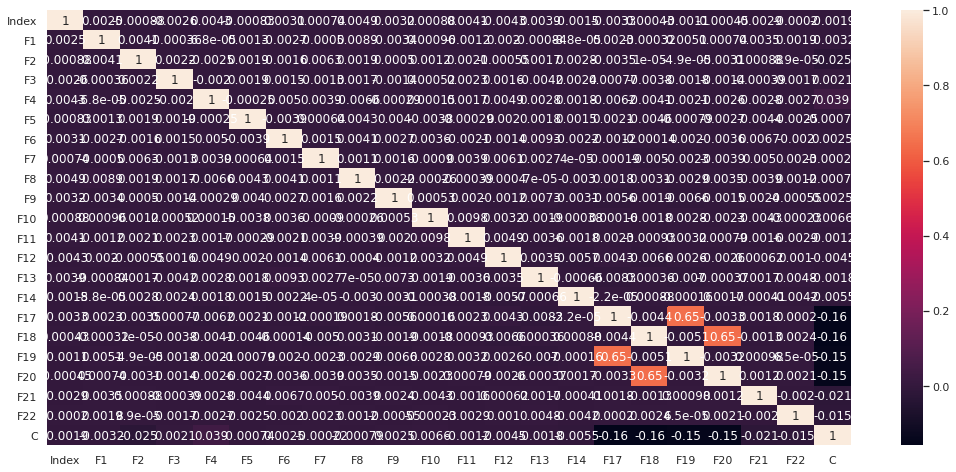

In [10]:
sns.set(font_scale=1)
plt.figure(figsize=(18,8))
sns.heatmap(train_df.corr(),annot=True)

In [11]:
index = test_df['Index']

lab_enc = LabelEncoder()
test_df['Index']=lab_enc.fit_transform(test_df['Index'])

train_df['F15']=pd.to_datetime(train_df['F15'],format = '%m/%d/%Y').dt.day
train_df['F16']=pd.to_datetime(train_df['F16'],format = '%m/%d/%Y').dt.day
test_df['F15']=pd.to_datetime(test_df['F15'],format = '%m/%d/%Y').dt.day
test_df['F16']=pd.to_datetime(test_df['F16'],format = '%m/%d/%Y').dt.day
index.head()

0    T30234341
1    T30234342
2    T30234343
3    T30234344
4    T30234345
Name: Index, dtype: object

In [12]:
df = pd.concat([train_df, test_df])

print(train_df.shape, test_df.shape, df.shape)

(101180, 24) (19913, 23) (121093, 24)


In [13]:
num = df._get_numeric_data()
num[num < 0] = 0

df.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,0,0,9982,0,...,0,4,6,2,1,706,305,1,2,0.0
1,2,0.321128,0.281119,0.907283,0.772159,0,1219,1663,1287,0,...,609277486,24,5,1,1,423,206,18,7,1.0
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,0,0,0,...,0,12,22,2,1,703,315,1,4,0.0
3,4,0.320641,0.957234,0.346000,0.646479,0,0,9681,0,3474,...,4868760308,18,10,1,1,122,304,15,1,0.0
4,5,0.475961,0.623008,0.544988,0.159709,1571,0,0,0,4407,...,9757408267,10,19,1,1,486,240,1,1,0.0


In [14]:
# df['C'] ,lam = scipy.stats.boxcox(df['C'])

In [15]:
df.apply(lambda x: sum(x.isnull()))

Index        0
F1           0
F2           0
F3           0
F4           0
F5           0
F6           0
F7           0
F8           0
F9           0
F10          0
F11          0
F12          0
F13          0
F14          0
F15          0
F16          0
F17          0
F18          0
F19          0
F20          0
F21          0
F22          0
C        19913
dtype: int64

In [16]:
df.describe()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
count,121093.000000,121093.000000,121093.000000,121093.000000,121093.000000,121093.000000,121093.000000,121093.000000,121093.000000,121093.000000,...,1.210930e+05,121093.000000,121093.000000,121093.000000,121093.000000,121093.000000,121093.000000,121093.000000,121093.000000,101180.000000
mean,43908.406085,0.501960,0.501397,0.499762,0.499712,2491.133608,2503.593346,2496.935133,2513.017714,2508.416597,...,2.479353e+09,15.721049,15.746212,1.340705,1.335114,387.482257,387.050606,4.595972,4.593734,0.245375
std,30743.148671,0.287897,0.288887,0.288921,0.288621,3230.868539,3229.037218,3228.816658,3230.677268,3229.517974,...,3.217055e+09,8.803013,8.780550,0.896728,0.882527,235.970454,235.479798,4.776469,4.770558,0.430311
min,0.000000,0.000018,0.000004,0.000002,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,15137.000000,0.253404,0.251249,0.248626,0.250408,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,8.000000,8.000000,1.000000,1.000000,188.000000,187.000000,1.000000,1.000000,0.000000
50%,40634.000000,0.501406,0.500876,0.499432,0.500877,0.000000,0.000000,7.000000,48.000000,20.000000,...,0.000000e+00,16.000000,16.000000,1.000000,1.000000,374.000000,374.000000,3.000000,3.000000,0.000000
75%,70907.000000,0.752968,0.752378,0.750234,0.748854,4983.000000,5016.000000,4970.000000,5022.000000,5036.000000,...,4.954461e+09,23.000000,23.000000,1.000000,1.000000,560.000000,561.000000,7.000000,7.000000,0.000000
max,101180.000000,0.999993,0.999992,0.999985,0.999977,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9.999997e+09,31.000000,31.000000,6.000000,6.000000,901.000000,901.000000,21.000000,21.000000,1.000000


In [17]:
df = df.dropna()
df['C'].count

<bound method Series.count of 0         0.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
101175    1.0
101176    0.0
101177    0.0
101178    0.0
101179    1.0
Name: C, Length: 101180, dtype: float64>

In [18]:
X=df.drop(columns=['C']) 
test=test_df
Y=train_df['C']
X.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,1,0.224506,0.500340,0.489860,0.902413,7934,0,0,9982,0,...,6176861823,0,4,6,2,1,706,305,1,2
1,2,0.321128,0.281119,0.907283,0.772159,0,1219,1663,1287,0,...,0,609277486,24,5,1,1,423,206,18,7
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,0,0,0,...,0,0,12,22,2,1,703,315,1,4
3,4,0.320641,0.957234,0.346000,0.646479,0,0,9681,0,3474,...,0,4868760308,18,10,1,1,122,304,15,1
4,5,0.475961,0.623008,0.544988,0.159709,1571,0,0,0,4407,...,9984692447,9757408267,10,19,1,1,486,240,1,1


In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [3]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [21]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(70826, 23) (30354, 23) (70826,) (30354,)


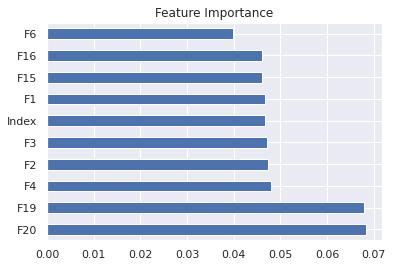

In [22]:
from sklearn.ensemble import ExtraTreesClassifier

def extclass(x,y):
    model = ExtraTreesClassifier()
    model.fit(x,y)
    
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    plt.title('Feature Importance')
    plt.show()
   
    return model

etcmodel = extclass(X_train,y_train)

XGBoost Train data Score : 0.7629966396521052 , Validation data Score : 0.7600975159781248


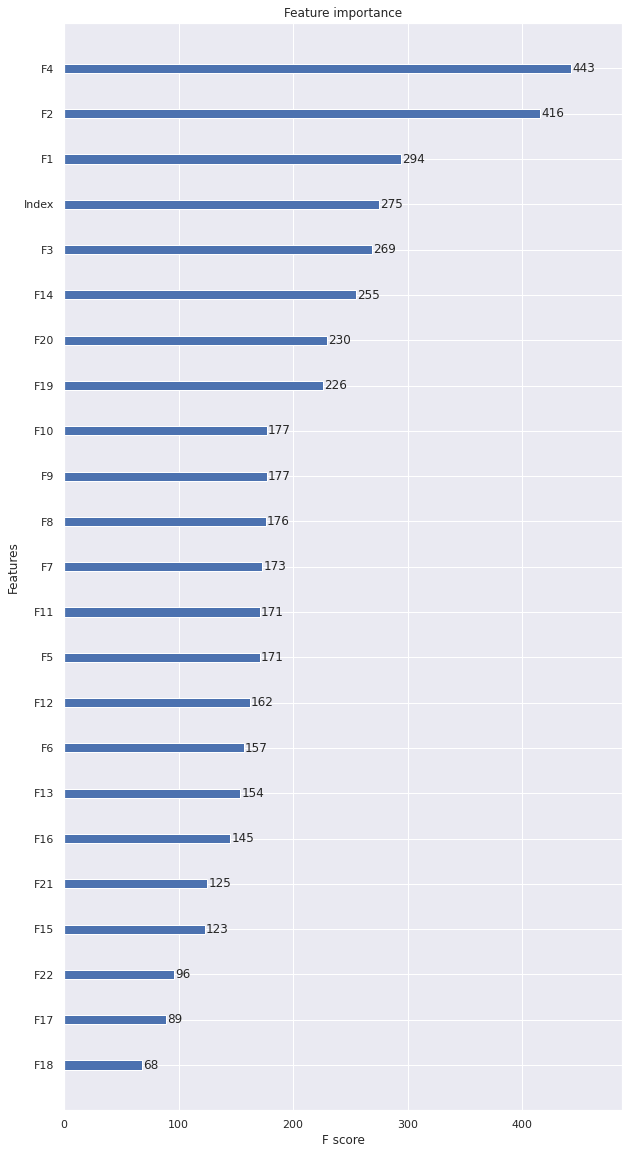

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from xgboost import plot_importance

def xgbclass(x_train,y_train,x_val,y_val):
    model = XGBClassifier()
    model = XGBClassifier(learning_rate=0.1,n_estimators=100)
    mf = model.fit(x_train,y_train)
#     y_pred=model.predict(x_val)
#     y_predict = mf.predict_proba(x_val)
    print("XGBoost Train data Score" , ":" , mf.score(x_train, y_train) 
          , "," ,"Validation data Score" ,":" , mf.score(x_val, y_val))
    
    
    # plot feature importance
    fig, ax = plt.subplots(figsize=(10, 20))
    plot_importance(mf, ax=ax)

    plt.show()
    return model

xgmodel = xgbclass(X_train,y_train,X_test,y_test)

In [24]:

def modelscores(model,Model):
    classes = ['0.0','1.0']
    y_pred = model.predict(X_test)
    
#     Confusion Matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)
    
    
    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')
    
    print('\n',classification_report(y_test,y_pred,target_names=classes))
    
    print("\nModel Training Score" , ":" , model.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , model.score(X_test, y_test))
#     print(y_pred)
    df['C'] = pd.DataFrame(y_pred)
    df_out = pd.merge(df,df[['C']],how = 'left',left_index = True, right_index = True)

In [25]:
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

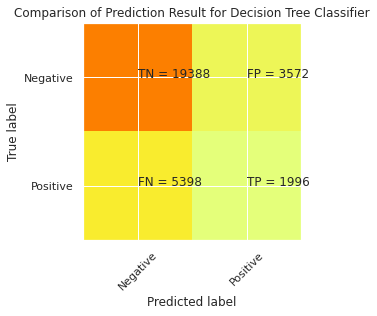

Accuracy of the Model Decision Tree Classifier 70.4%

               precision    recall  f1-score   support

         0.0       0.78      0.84      0.81     22960
         1.0       0.36      0.27      0.31      7394

    accuracy                           0.70     30354
   macro avg       0.57      0.56      0.56     30354
weighted avg       0.68      0.70      0.69     30354


Model Training Score : 0.8183859034817722 , Cross Validation Score : 0.7044870527772287


In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Model = "Decision Tree Classifier"

tree = DecisionTreeClassifier(min_samples_leaf=17)
dtcmodel= tree.fit(X_train, y_train)

# y_pred = dtcmodel.predict(X_test)

modelscores(dtcmodel,Model)
# df.head()

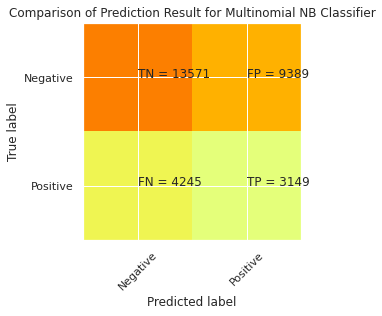

Accuracy of the Model Multinomial NB Classifier 55.1%

               precision    recall  f1-score   support

         0.0       0.76      0.59      0.67     22960
         1.0       0.25      0.43      0.32      7394

    accuracy                           0.55     30354
   macro avg       0.51      0.51      0.49     30354
weighted avg       0.64      0.55      0.58     30354


Model Training Score : 0.5455058876683704 , Cross Validation Score : 0.5508334980562694


,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,0,0,9982,0,...,0,4,6,2,1,706,305,1,2,0.0
1,2,0.321128,0.281119,0.907283,0.772159,0,1219,1663,1287,0,...,609277486,24,5,1,1,423,206,18,7,0.0
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,0,0,0,...,0,12,22,2,1,703,315,1,4,1.0
3,4,0.320641,0.957234,0.346000,0.646479,0,0,9681,0,3474,...,4868760308,18,10,1,1,122,304,15,1,1.0
4,5,0.475961,0.623008,0.544988,0.159709,1571,0,0,0,4407,...,9757408267,10,19,1,1,486,240,1,1,0.0


In [27]:
Model = "Multinomial NB Classifier"

clf = MultinomialNB()
nbmodel= clf.fit(X_train, y_train)

modelscores(nbmodel,Model)
df.head()

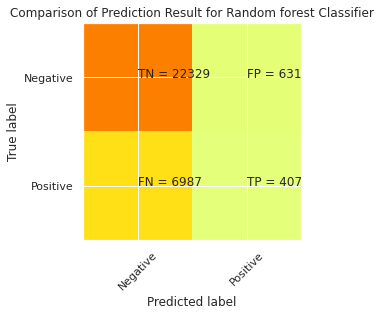

Accuracy of the Model Random forest Classifier 74.9%

               precision    recall  f1-score   support

         0.0       0.76      0.97      0.85     22960
         1.0       0.39      0.06      0.10      7394

    accuracy                           0.75     30354
   macro avg       0.58      0.51      0.48     30354
weighted avg       0.67      0.75      0.67     30354


Model Training Score : 0.9871657300991161 , Cross Validation Score : 0.7490281346774725


,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,0,0,9982,0,...,0,4,6,2,1,706,305,1,2,0.0
1,2,0.321128,0.281119,0.907283,0.772159,0,1219,1663,1287,0,...,609277486,24,5,1,1,423,206,18,7,0.0
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,0,0,0,...,0,12,22,2,1,703,315,1,4,0.0
3,4,0.320641,0.957234,0.346000,0.646479,0,0,9681,0,3474,...,4868760308,18,10,1,1,122,304,15,1,0.0
4,5,0.475961,0.623008,0.544988,0.159709,1571,0,0,0,4407,...,9757408267,10,19,1,1,486,240,1,1,0.0


In [28]:
Model = "Random forest Classifier"

clf = RandomForestClassifier(n_estimators=34, min_samples_leaf=2)
rfmodel= clf.fit(X_train, y_train)

modelscores(rfmodel,Model)
df.head()

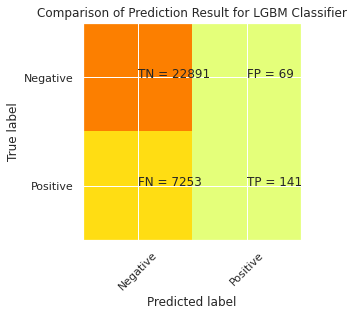

Accuracy of the Model LGBM Classifier 75.9%

               precision    recall  f1-score   support

         0.0       0.76      1.00      0.86     22960
         1.0       0.67      0.02      0.04      7394

    accuracy                           0.76     30354
   macro avg       0.72      0.51      0.45     30354
weighted avg       0.74      0.76      0.66     30354


Model Training Score : 0.7612458701606755 , Cross Validation Score : 0.7587797324899519


,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,0,0,9982,0,...,0,4,6,2,1,706,305,1,2,0.0
1,2,0.321128,0.281119,0.907283,0.772159,0,1219,1663,1287,0,...,609277486,24,5,1,1,423,206,18,7,0.0
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,0,0,0,...,0,12,22,2,1,703,315,1,4,0.0
3,4,0.320641,0.957234,0.346000,0.646479,0,0,9681,0,3474,...,4868760308,18,10,1,1,122,304,15,1,0.0
4,5,0.475961,0.623008,0.544988,0.159709,1571,0,0,0,4407,...,9757408267,10,19,1,1,486,240,1,1,0.0


In [29]:
from lightgbm import LGBMClassifier

Model = "LGBM Classifier"

lgbm = LGBMClassifier()

lgbmodel= lgbm.fit(X_train, y_train)

modelscores(lgbmodel,Model)
df.head()

R2_Score:  -0.3654796180633393


Text(0, 0.5, 'Predicted')

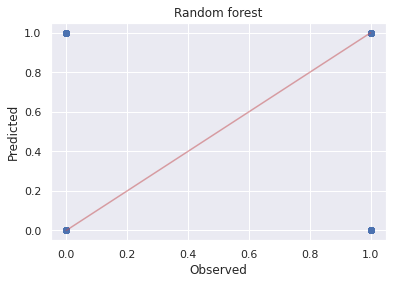

In [27]:
# final_model = grid_search.best_estimator_
# predictions
final_predictions = rfmodel.predict(X_test)
# rmscores()

# Computing R^2 performance metric for the regression model
from sklearn import metrics
print('R2_Score: ', metrics.r2_score(y_test,final_predictions))

plt.title('Random forest')
plt.scatter(y_test,final_predictions)
plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'r', alpha=0.5)
plt.xlabel('Observed')
plt.ylabel('Predicted')

In [31]:
y_pred_dt = dtcmodel.predict(X_test)
y_pred_dt = y_pred_dt.astype(np.int16)

y_pred_rf = rfmodel.predict(X_test)
y_pred_rf = y_pred_rf.astype(np.int16)

y_pred_lg = lgbmodel.predict(X_test)
y_pred_lg = y_pred_lg.astype(np.int16)

y_pred_rf.shape

(30354,)

In [16]:
# df['C'] ,lam = scipy.stats.boxcox(df['C'])


In [ ]:
# ans = pd.DataFrame({'C':inv_boxcox(rfmodel.predict(test),lam)})
# ans.to_csv('answer.csv',index=None)

In [34]:
new_df = pd.DataFrame()
new_df['C'] = y_pred_rf
new_df['index'] = index
new_df[['index', 'C']].to_csv('Submission_rf.csv', index=False)